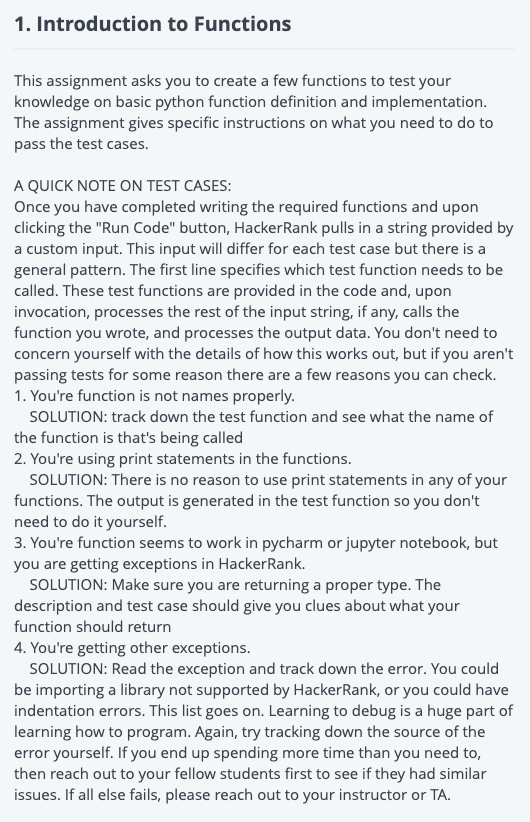

In [ ]:
import sys

import re
# 1. Create a function called return_num_vowels that accepts an 
# input string and returns a dictionary where the keys are the vowels
# a, e, i, o, u, and the values are the count of the vowels.

# write function here
def return_num_vowels(case):
    case_spl = re.split('\W',case)
    dic_all = {'a': 0, 'e': 0, 'i':0, 'o':0, 'u':0}

    for elements in case_spl:
        str_len = len(elements)
        for i in range(len(elements)):
            x = elements[i]
            if x == 'a' or x == 'A':
                dic_all['a'] +=1
            elif x == 'e' or x == 'E':
                dic_all['e']  +=1
            elif x == 'i' or x == 'I':
                dic_all['i']  +=1
            elif x == 'o' or x == 'O':
                dic_all['o']  +=1
            elif x == 'u' or x == 'U':
                dic_all['u']  +=1
    return dic_all
    

# 2. Create a function called return_num_characters that counts the number english alpha
# characters in a input string (less spaces, punctuation, numbers, and all other characters not a-z) 
# and returns the count. Hint: review the python built-in functions to find functions that could help.

# write function here

def return_num_characters(case):
    count = 0
    for i in range(len(case)):
        x = case[i]
        if x.encode().isalpha() == True:
            count +=1
    return count
            

# 3. Create a function called bar_plot that draws a bar plot taking as input a list of numbers
# and printing out bars. This function should ignore negative values and floating point values.
#Example:
#bar_plot([1,2,10])
#+
#++
#++++++++++

# write function here

def bar_plot(num):
    lst = []
    for i in num:
        if i <= 0:
            pass
        else:
            x = '+'*i
            print(x)
        
    
def case_vowel_count(string_arg):
    string_arg = ' '.join(string_arg)
    vowel_count = return_num_vowels(string_arg)
    sys.stdout.write(f"a {vowel_count['a']}\n")
    sys.stdout.write(f"e {vowel_count['e']}\n")
    sys.stdout.write(f"i {vowel_count['i']}\n")
    sys.stdout.write(f"o {vowel_count['o']}\n")
    sys.stdout.write(f"u {vowel_count['u']}\n")
                     

def case_character_count(string_arg):
    string_arg = ' '.join(string_arg)
    character_count = return_num_characters(string_arg)
    sys.stdout.write(str(character_count))
                     
def case_bar_plot(list_arg):
    list_arg = map(int, list_arg[0].split(' '))
    bar_plot(list_arg)
                     
                     
if __name__ == '__main__':
    test_func_name = sys.stdin.readline().strip()
    test_func = globals()[test_func_name]
    arg = sys.stdin.readlines()
    test_func(arg)

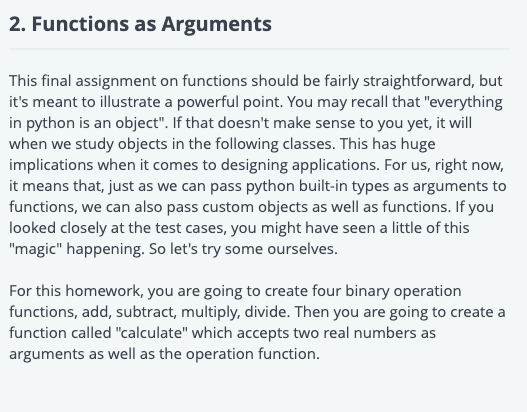

In [ ]:
import sys
# Create the four binary operation functions below. (This should be super easy!)

add = '+'
subtract = '-'
multiply = '*'
divide = '/'

# Create a function called calculator which accepts two numbers as arguments as well as an operation function

def calculate(a,b,func):
    if func == '+':
        x = a + b
    if func == '-':
        x = a - b
    if func == '*':
        x = a * b
    if func == '/':
        x = a / b
    return x
if __name__ == '__main__':
    arg1 = int(sys.stdin.readline().strip())
    arg2 = int(sys.stdin.readline().strip())
    funcs = [add, subtract, multiply, divide]
    for func in funcs:
        sys.stdout.write(str(calculate(arg1, arg2, func))+'\n')

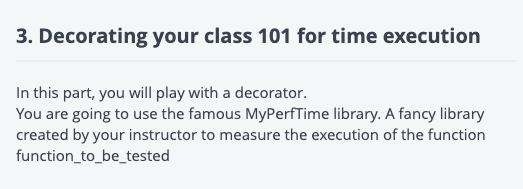

In [ ]:
import random

random.seed(0)
class MyPerfTime:
    elapsed_time=0
    @staticmethod
    def time():
        number=random.randrange(1, 10)
        MyPerfTime.elapsed_time+=number
        return MyPerfTime.elapsed_time-number


# Create the decorator here

def timer(function):
    def wrapper():
        y1 = MyPerfTime.time()
        x = function()
        z = str(function)
        y2 = MyPerfTime.time()
        y = y2 - y1
        print('Testing the performance of'+" \'"+function.__name__+"\'")
        print('Finished'+" \'"+function.__name__+"\'"+' in {:.4f} secs'.format(y))
        return x
    return wrapper

@timer
def function_to_be_tested():
    res=[]
    for i in range(8):
        res.append(str(i))
    return ' '.join(res)

@timer
def second_function_to_be_tested():
    res=[]
    for i in range(12):
        res.append(str(i))
    return ' '.join(res)

print(function_to_be_tested())
print(second_function_to_be_tested())

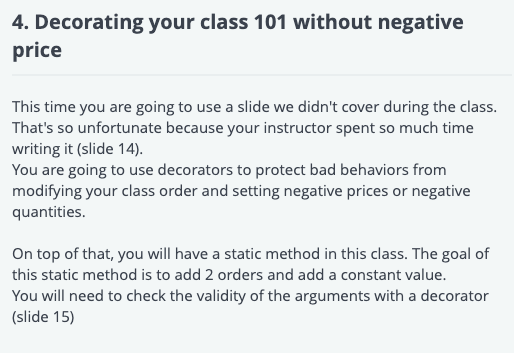

In [ ]:
# you should modify this decorator since it will be used in the static method defined below the class
def argument_test_natural_number(f):
    def helper(*args,**kwargs):
        f = f(*args, **kwargs)
    return f



class Order:

    # you should leave the constructor unchanged
    def __init__(self,a,b):
        self.price = a
        self.quantity = b

    # now time to play with decorators to declare propoerties slide 14

    # when you create the setter, you need to check if quantity >=0
    # if not you can use assert
    # do the same for price
    # don't forgot that you will certainly need to override __repr__    
    @property
    def price(self):
        return self.__price
    
    @price.setter
    def price(self, x):
        print('I am checking if the price is higher than 0')
        assert (x >= 0)
        self.__price = x
        return self.__price
    
    @property
    def quantity(self):
        return self.__quantity
    
    @quantity.setter
    def quantity(self, y):
        print('I am checking if the quantity is higher than 0')
        assert (y >= 0)
        self.__quantity = y
        return self.__quantity
    
    def __repr__(self):
        return f'{self.__class__.__name__}(price={self.__price},quantity={self.__quantity})'



    @staticmethod
    @argument_test_natural_number
    def add_quantity_for_two_orders_and_one_number(a,b,c):
        return a.quantity+b.quantity+c
    
    
x = Order(10,100)
x.quantity=15
x.price=150
print(x)
y = Order(10,100)
y.quantity=13
y.price=16
print(y)

try:
    y.quantity=-100
except:
    print("dammed the quantity was negative")


try:
    y.price=-100
except:
    print("dammed the price was negative")



try:
    print(Order.add_quantity_for_two_orders_and_one_number(100, y, 100))
except:
    print("mistakes after mistakes...I should go to sleep instead of writing tests for my students. 1st argument is an order")


try:
    print(Order.add_quantity_for_two_orders_and_one_number(x, 100, 100))
except:
    print("NO NO STOP THAT -- again an error")


try:
    print(Order.add_quantity_for_two_orders_and_one_number(x, y, 100))
except:
    print("You will never see this code again !")

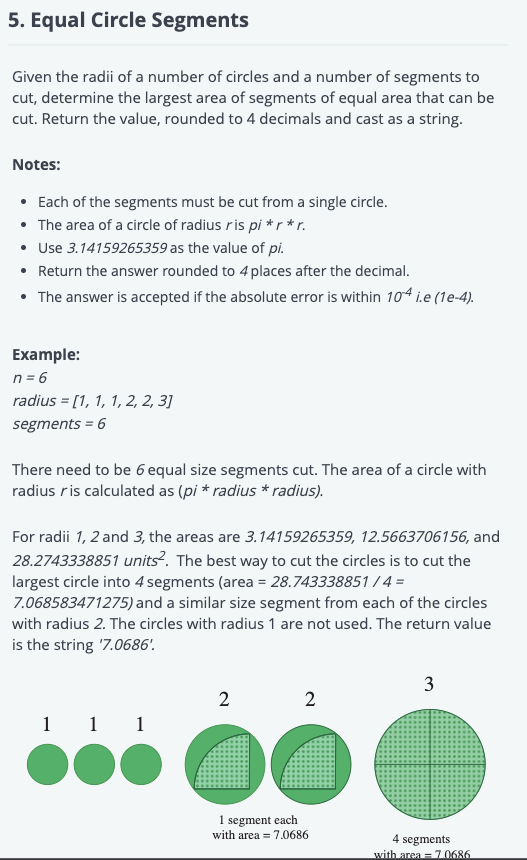

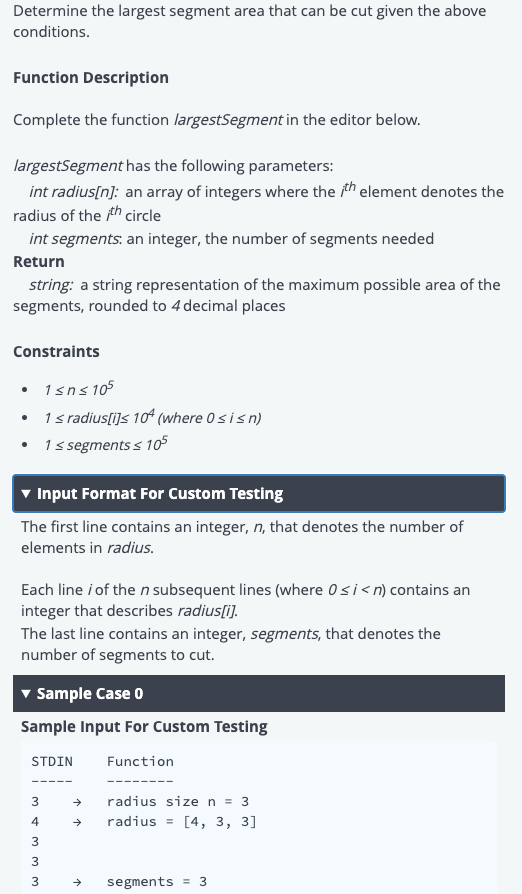

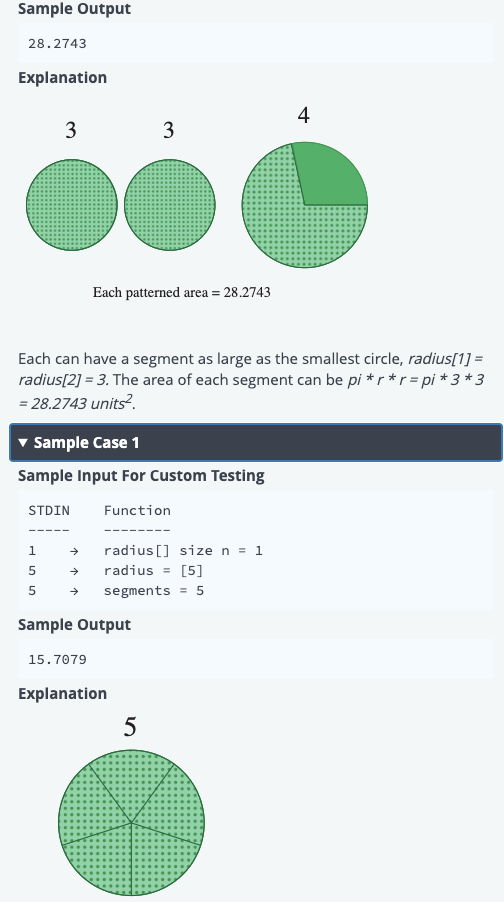

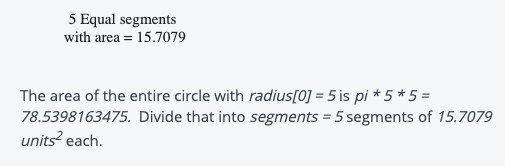

In [ ]:
#!/bin/python3

import math
import os
import random
import re
import sys


#
# Complete the 'largestSegment' function below.
#
# The function is expected to return a STRING.
# The function accepts following parameters:
#  1. INTEGER_ARRAY radius
#  2. INTEGER segments
#

def largestSegment(radius, segments):
    # Write your code here
    area = []
    for r in radius:
        x = r*r*math.pi
        area.append(x)
    
    def judge(y):
        z = 0
        for x in area:
            z += x // m
            if z >= segments:
                return True
        return False
    
    k = 0
    max_areas = max(area)
    while k + 1e-5<= max_areas:
        m = (k + max_areas) / 2
        if judge(m):
            k = m
        else:
            max_areas = m
    m_round = round(m,4)
    return f'{m_round}' 
if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    radius_count = int(input().strip())

    radius = []

    for _ in range(radius_count):
        radius_item = int(input().strip())
        radius.append(radius_item)

    segments = int(input().strip())

    result = largestSegment(radius, segments)

    fptr.write(result + '\n')

    fptr.close()


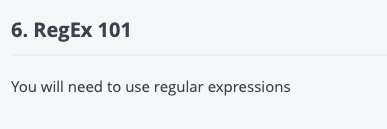

In [ ]:
import re
import sys

poesie_francaise="""Le présent se fait vide et triste,
Ô mon amie, autour de nous ;
Combien peu de passé subsiste !
Et ceux qui restent changent tous.

Nous ne voyons plus sans envie
Les yeux de vingt ans resplendir,
Et combien sont déjà sans vie
Des yeux qui nous ont vus grandir !

Que de jeunesse emporte l'heure,
Qui n'en rapporte jamais rien !
Pourtant quelque chose demeure :
Je t'aime avec mon cœur ancien,

Mon vrai cœur, celui qui s'attache
Et souffre depuis qu'il est né,
Mon cœur d'enfant, le cœur sans tache
Que ma mère m'avait donné ;

Ce cœur où plus rien ne pénètre,
D'où plus rien désormais ne sort ;
Je t'aime avec ce que mon être
A de plus fort contre la mort ;

Et, s'il peut braver la mort même,
Si le meilleur de l'homme est tel
Que rien n'en périsse, je t'aime
Avec ce que j'ai d'immortel.    """

def is_password_allowed(string):
    # you need to validate if a password is correct or not
    # the password policy is the following
    # at least 32 characters
    # it should contain only a-z, A-Z and 0-9
    if re.match('\w{32}(\w)*',string):
        return True
    else:
        return False
    
def find_position_of_a_string(pattern,text):
    # you will return if you found a string the position of this string
    if bool(re.search(pattern, text)) == True:
        x = re.search(pattern, text)
        return f'Found "{pattern}" at {x.start()}:{x.end()}'
    else:
        return None
def find_all_the_words_with_the_size(n,text):
    # you will find all the words from the string text where the size of these words is n
    x = re.findall('\w+',text)
    y = []
    for elements in x:
        if len(elements) == n:
            y.append(elements)
    return y    
    
def display_first_word_of_a_line(text):
    # you will just return the first word of a line
    x = re.findall('^\w+',text)
    return x
    
def is_it_a_decimal_with_a_precision_of_3(num):
    # you will verify if the preicison is 3 for a number num
    if re.match('^\d\.\d{3}$',num):
        return True
    else:
        return False
def test1():
    print(is_password_allowed("Dammedthispythonclassisnotoverye"))
    print(is_password_allowed("Dammedthispythonclassisnotovery"))
    print(is_password_allowed("Dammedthispythonclassisnoe4324234tovery"))
    print(is_password_allowed("Damme$#dthispythonclassisnoe4324234tovery"))
    print(is_password_allowed("Damme$#dthispythonclassisnoe4324234to@very"))


def test2():
    print(find_position_of_a_string('Christmas','This is close to be Christmas!!'))
    print(find_position_of_a_string('with', 'I will not have any contacts with Python for Thanksgiving'))
    print(find_position_of_a_string('berk', 'I will not have any contacts with Python for Thanksgiving'))

def test3():
    print(find_all_the_words_with_the_size(5,'Python is better than Pytho. Sebas prefers Pytho. It is short'))
    print(find_all_the_words_with_the_size(7,'Christmas without Python is like Santa Claus without gifts'))
    print(find_all_the_words_with_the_size(3, 'Seb will miss all his students for Christmas and he will hope that they will get job'))

    for i in range(2,10):
        print(find_all_the_words_with_the_size(i, poesie_francaise))


def test4():
    print(display_first_word_of_a_line('Python is better than Pytho. Sebas prefers Pytho. It is short'))
    print(display_first_word_of_a_line('Christmas without Python is like Santa Claus without gifts'))
    print(display_first_word_of_a_line( 'Seb will miss all his students for Christmas and he will hope that they will get job'))
    print(display_first_word_of_a_line(poesie_francaise))


def test5():
    print(is_it_a_decimal_with_a_precision_of_3("1.233"))
    print(is_it_a_decimal_with_a_precision_of_3("1.000"))
    print(is_it_a_decimal_with_a_precision_of_3("1.2331"))
    print(is_it_a_decimal_with_a_precision_of_3("seb"))
    print(is_it_a_decimal_with_a_precision_of_3("1.1"))


if __name__ == '__main__':
    test_number = int(input().strip())
    globals()['test'+str(test_number)]()

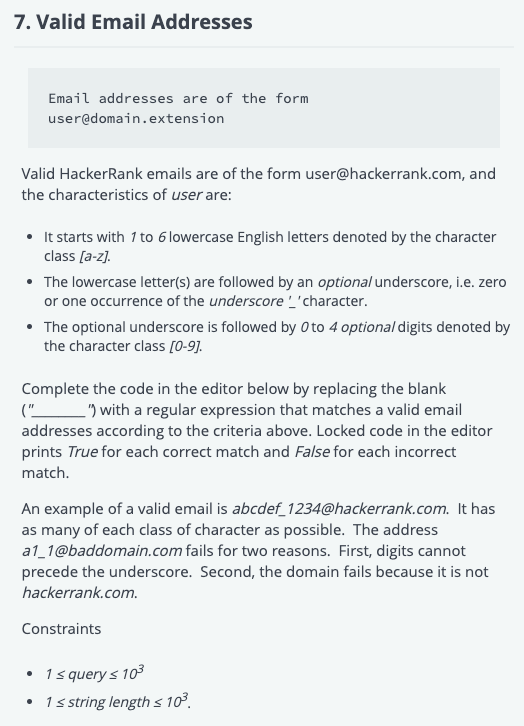

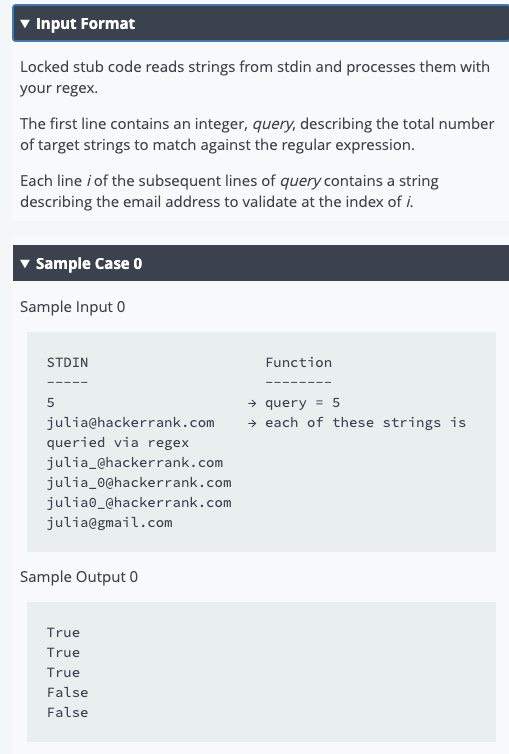

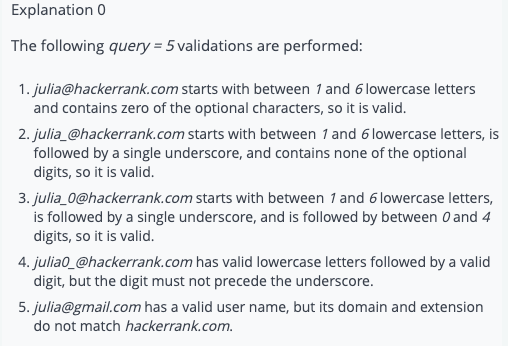

In [ ]:
#!/bin/python3

from os import environ
from re import compile
from re import match

#
# Write the regular expression in the blank space below
#
regularExpression = '^[a-z]{1,6}\_{0,1}\d{0,4}\@hackerrank\.com'

pattern = compile(regularExpression)

query = int(input())
result = ['False'] * query

for i in range(query):
    someString = input()
    
    if pattern.match(someString):
        result[i] = 'True'

with open(environ['OUTPUT_PATH'], 'w') as fileOut:
    fileOut.write('\n'.join(result))

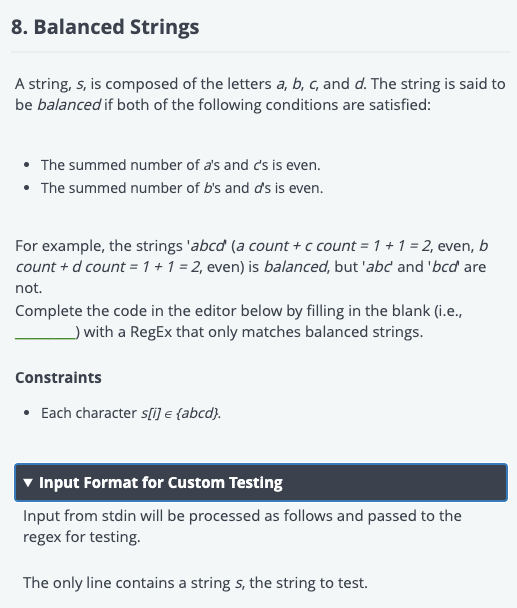

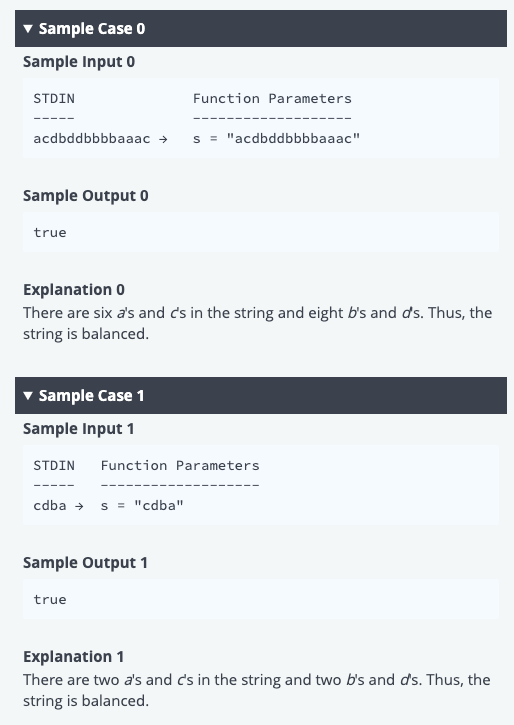

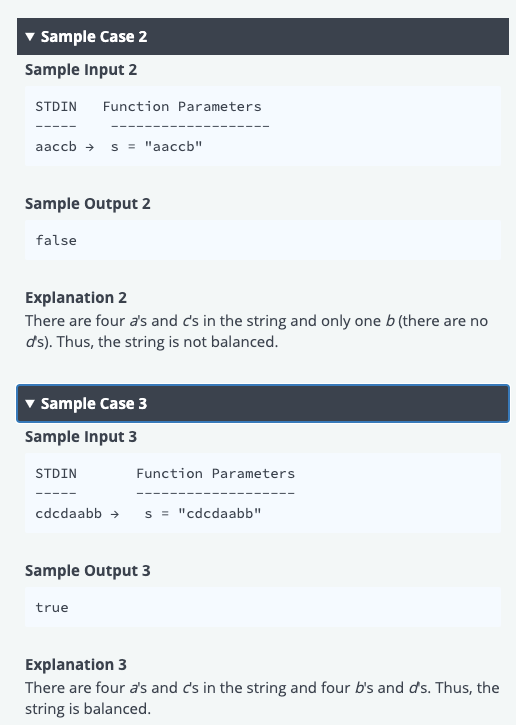

In [ ]:
Regex_Pattern = r"^(([ac]{2}|[bd]{2})|([ac][bd]|[bd][ac])([ac]{2}|[bd]{2})*([ac][bd]|[bd][ac]))*$"	# Do not delete 'r'.

import re

print(str(bool(re.search(Regex_Pattern, input()))).lower())